# Week 5 - Genetic Algorithms
---

**Very nice lecture I recommend you watch:** <br>
[MIT 6.034 Artificial Intelligence, Fall 2010 13. Learning: Genetic Algorithms](https://www.youtube.com/watch?v=kHyNqSnzP8Y)

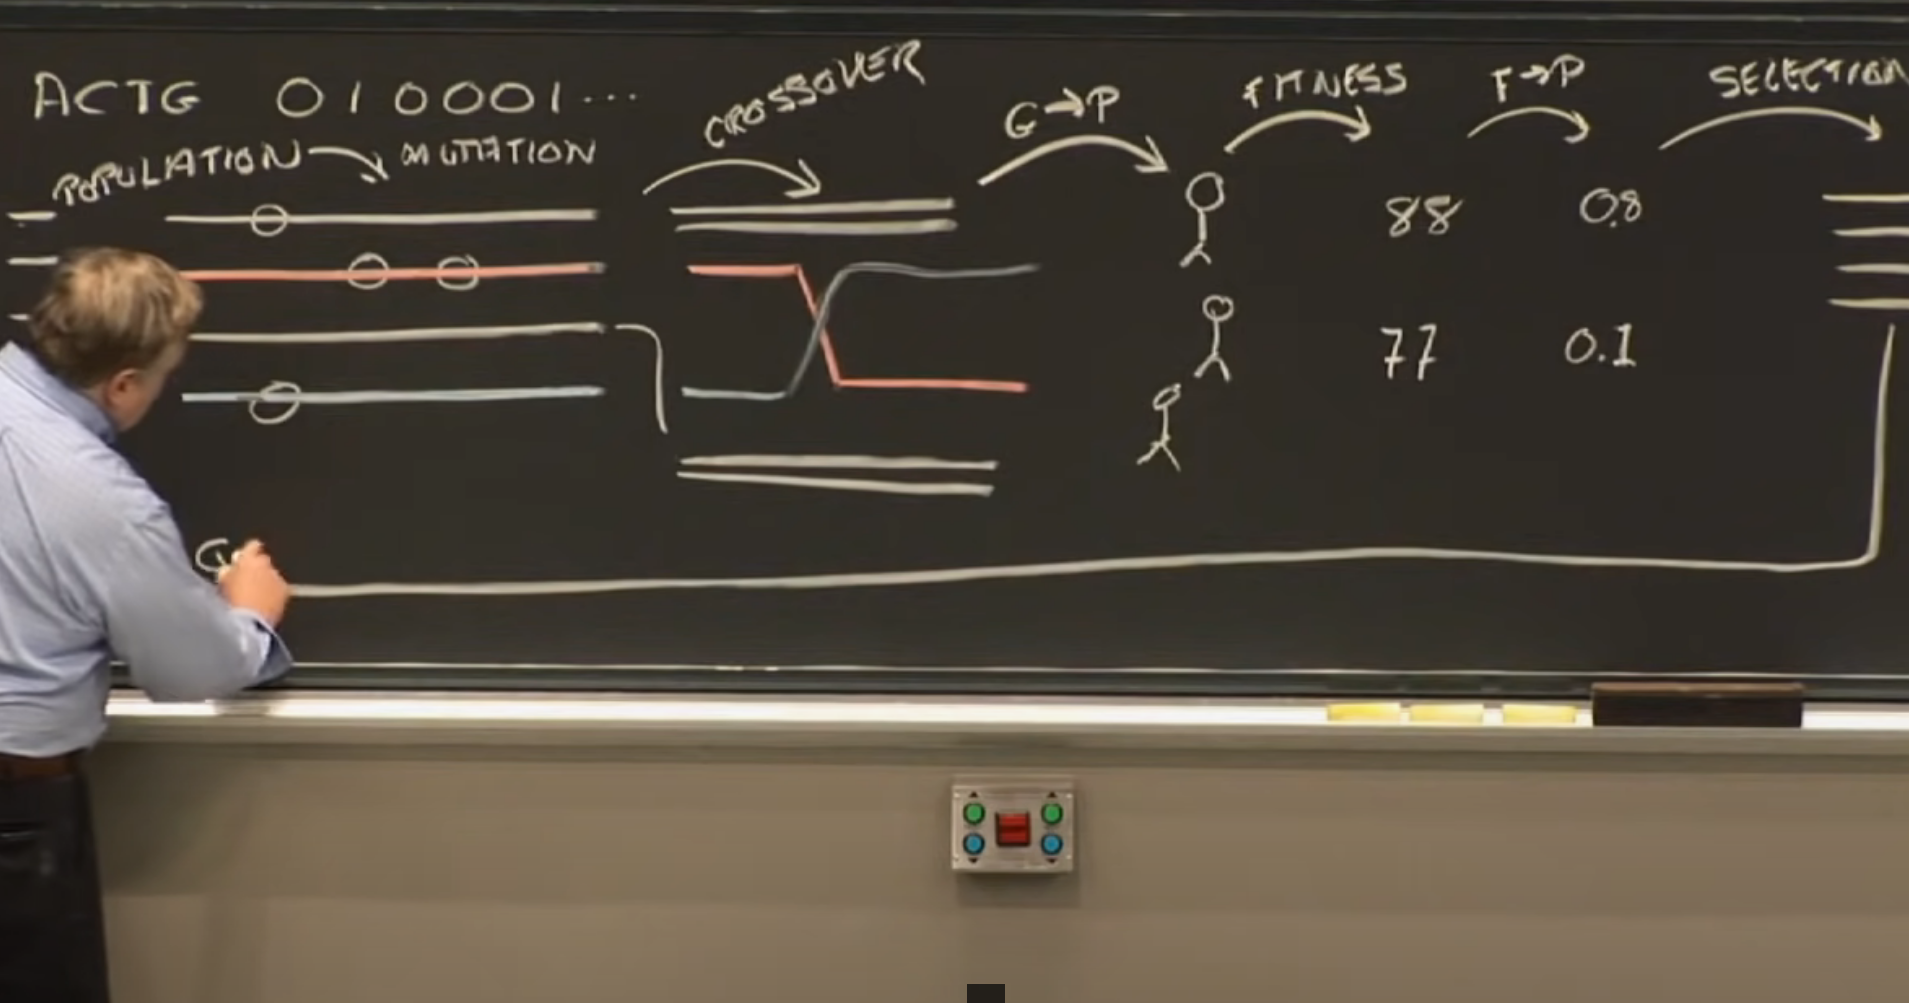

## Classic toy example - evolving a string

In [29]:
import random

alphabet = "abcdefghijklmnopqrstuvwxyz "

def random_dna(target_length):
    return ''.join(random.choices(alphabet, k=target_length))

In [30]:
random_dna(target_length=10)

'tmgatf  rt'

In [31]:
def initial_population(population_size, target_length):
    population = []
    for i in range(population_size):
        dna = random_dna(target_length=target_length)
        population.append(dna)
        
    return population

In [32]:
example_population = initial_population(population_size=5, target_length=10)
example_population

['hdvihmjocq', 'mzwgdvippm', 'vz dsrdhl ', 'shqyejdewj', 'nrrtebk xx']

In [33]:
def fitness(dna, target):
    return sum(a == b for a, b in zip(dna, target))

In [34]:
target = 'the quick brown fox'
dna = random_dna(target_length=len(target))
fitness(dna, target=target)

0

In [44]:
def select_parents(population, individual_fitness, selection_size, target):
    parents = []
    left_parents = random.choices(population, weights=individual_fitness, k=selection_size)
    right_parents = random.choices(population, weights=individual_fitness, k=selection_size)
    return list(zip(left_parents, right_parents)), individual_fitness

In [46]:
individual_fitness = [fitness(dna, target) for dna in example_population]
example_parents, _ = select_parents(example_population, individual_fitness, selection_size=5, target=target)
example_parents

[('vz dsrdhl ', 'mzwgdvippm'),
 ('mzwgdvippm', 'vz dsrdhl '),
 ('shqyejdewj', 'mzwgdvippm'),
 ('shqyejdewj', 'shqyejdewj'),
 ('vz dsrdhl ', 'mzwgdvippm')]

In [47]:
def crossover(left_parent, right_parent):
    p = random.randint(0, len(left_parent))
    return left_parent[:p] + right_parent[p:], right_parent[:p] + left_parent[p:]

In [48]:
crossover(*example_parents[0])

('vz dsrdppm', 'mzwgdvihl ')

In [49]:
def rand():
    return random.random()

In [50]:
def mutate(dna, mutation_probability=0.5):
    other_dna = random_dna(target_length=len(dna))
    return ''.join(a if rand() > mutation_probability else b for a, b in zip(dna, other_dna))

In [51]:
mutate(example_population[0], mutation_probability=0.1)

'hdvihmjocq'

In [52]:
from IPython.display import clear_output, display
from ipywidgets import Output
from tqdm.auto import tqdm
import time

out = Output()

In [68]:
target = 'the quick brown fox jums over the lazy dog'
population = initial_population(population_size=20, target_length=len(target))
num_generations = 10000

display(out)

for i in tqdm(range(num_generations)):
    individual_fitness = [fitness(dna, target) for dna in population]
    parents, fitness_scores = select_parents(
        population,
        individual_fitness,
        selection_size=len(population) // 2,
        target=target,
    )

    new_population = [p[0] for p in sorted(zip(population, individual_fitness), key=lambda x: x[1])]
    new_population = new_population[-len(new_population) // 2:]
    for parent_a, parent_b in parents:
        child_a, child_b = crossover(parent_a, parent_b)
        new_population.append(mutate(child_a, mutation_probability=0.1))
    
    population = new_population
    population_scores = [fitness(p, target) for p in population]
    
    population_display = sorted(list(zip(population, population_scores)), key=lambda x: x[1])[-10:]

    with out:
        time.sleep(0.001)
        clear_output(wait=True)
        display(population_display)

    if target in population:
        break

Output(msg_id='a509cb1ceaf5450681d9d78f3ea701d8', outputs=({'output_type': 'display_data', 'data': {'text/plai…